In [1]:
import os
os.chdir('C:/Users/davietbe/Documents/develop')

In [2]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 10]

from deepberry.src.openalea.deepberry.ellipse_segmentation import berry_detection, berry_segmentation, load_berry_models
from deepberry.src.openalea.deepberry.features_extraction import berry_features_extraction
from deepberry.src.openalea.deepberry.utils import ellipse_interpolation

# 1. Data loading
### (Image: Phenoarch 2021 - plantid 7794 - task 3786 - angle 120°)

## Loads the two models (detection & ellipse-segmentation) and a grapevine image

In [3]:
model_detection, model_segmentation = load_berry_models('deepberry/examples/data/model')
image = cv2.cvtColor(cv2.imread('deepberry/examples/data/image.png'), cv2.COLOR_BGR2RGB)

## Displays the image

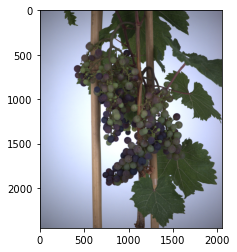

In [4]:
plt.imshow(image)

# 2. Berry detection

## Runs the detection using the Yolov4 deep-learning model

In [5]:
score_threshold_detection = 0.89
res_det = berry_detection(image=image, model=model_detection, score_threshold=score_threshold_detection)

## Displays the results

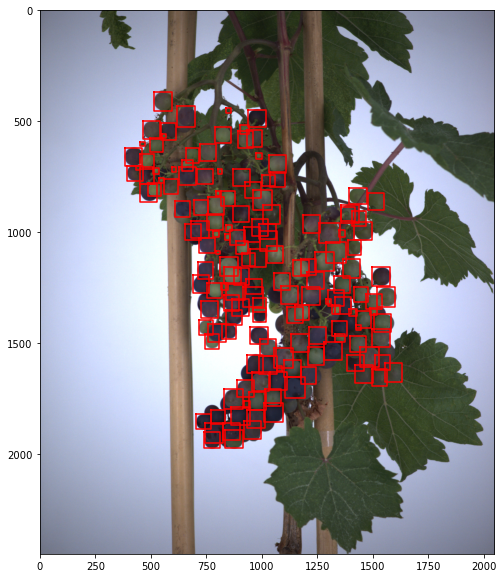

In [6]:
plt.imshow(image)
for _, (x, y, w, h, _) in res_det[['x', 'y', 'w', 'h', 'score']].iterrows():
    plt.plot([x, x, x + w, x + w, x], [y, y + h, y + h, y, y], 'r-')

# 3. Berry ellipse-segmentation

## Runs the segmentation using the U-Net deep-learning model

In [7]:
res_seg = berry_segmentation(image=image, model=model_segmentation, boxes=res_det, nms_threshold_ell=0.7)

## Displays the results

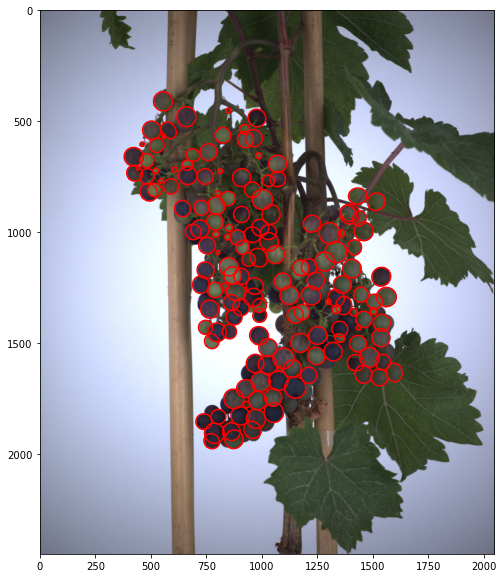

In [8]:
plt.imshow(image)
for _, (xe, ye, we, he, ae) in res_seg[['ell_x', 'ell_y', 'ell_w', 'ell_h', 'ell_a']].iterrows():
    lsp_x, lsp_y = ellipse_interpolation(x=xe, y=ye, w=we, h=he, a=ae, n_points=50)
    plt.plot(lsp_x, lsp_y, 'r-')

# 4. Berry features extraction

## Quantifies the size ('volume'), color ('hue_scaled') and roundness of each berry

In [9]:
res = berry_features_extraction(image=image, ellipses=res_seg)

## Displays the results

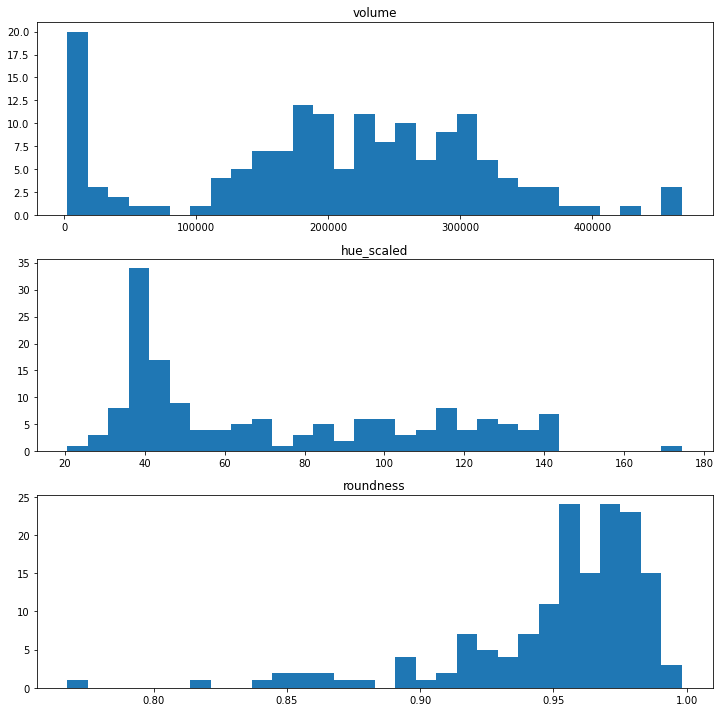

In [10]:
fig = plt.figure()
for k, feature in enumerate(['volume', 'hue_scaled', 'roundness']):
    ax = plt.subplot(3, 1, k + 1)
    ax.set_title(feature)
    plt.hist(res[feature], 30)
fig.tight_layout()